
# Data Generation Script

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(data, title="Histogram", xlabel="Value", ylabel="Frequency", color="blue"):
    """
    Plots a histogram for the given data with optimal bin sizes determined by the Freedman-Diaconis rule.

    Parameters:
        data (array-like): The input data for the histogram.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        color (str): Color of the histogram bars.
    """
    # Convert data to a numpy array for processing
    data = np.asarray(data)
    
    # Calculate Freedman-Diaconis bin width
    q25, q75 = np.percentile(data, [25, 75])  # Calculate Q1 and Q3
    iqr = q75 - q25  # Interquartile range
    bin_width = 2 * iqr / (len(data) ** (1/3))  # Freedman-Diaconis formula

    # If bin_width is too small, default to sqrt(n) bins
    if bin_width == 0:
        num_bins = int(np.sqrt(len(data)))
    else:
        num_bins = int(np.ceil((data.max() - data.min()) / bin_width))

    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=num_bins, color=color, alpha=0.75, edgecolor="black")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


In [2]:
import random
import pandas as pd
from utils import *
import os


# make directory to hold generated data
os.makedirs('generated_datasets', exist_ok=True)

# Define parameter limits
n_lims = [2, 3]
k_lims = [-0.1, 0]
d_lims = [500e-6, 500e-6]

# Define significant figures for each parameter
n_sig_figs = 6
k_sig_figs = 6
d_sig_figs = 6

# Function to round to significant figures
def round_to_sig_figs(value, sig_figs):
    if value == 0:
        return 0
    return round(value, sig_figs - int(f"{value:.1e}".split('e')[1]) - 1)

# Function to generate a dataset
def generate_dataset(N):
    data = {
        "n": [],
        "k": [],
        "d": []
    }
    for _ in range(N):
        n = random.uniform(*n_lims)
        k = random.uniform(*k_lims)
        d = random.uniform(*d_lims)

        # Apply significant figures
        n = round_to_sig_figs(n, n_sig_figs)
        k = round_to_sig_figs(k, k_sig_figs)
        d = round_to_sig_figs(d, d_sig_figs)

        data["n"].append(n)
        data["k"].append(k)
        data["d"].append(d)

    return pd.DataFrame(data)

# Example usage
N = 20000  # Number of entries
dataset = generate_dataset(N)

In [3]:
dataset.head(10)

,n,k,d
0,2.10168,-0.044536,0.0005
1,2.30214,-0.020281,0.0005
2,2.44811,-0.052000,0.0005
3,2.01324,-0.051215,0.0005
4,2.86665,-0.027159,0.0005
5,2.44681,-0.091067,0.0005
6,2.47480,-0.091232,0.0005
7,2.00406,-0.073709,0.0005
8,2.50647,-0.084282,0.0005
9,2.22619,-0.075015,0.0005


In [4]:
print(f'DataFrame shape: {dataset.shape}')
dataset.describe()

DataFrame shape: (20000, 3)


,n,k,d
count,20000.000000,20000.000000,2.000000e+04
mean,2.501088,-0.049656,5.000000e-04
std,0.288453,0.028930,2.168459e-19
min,2.000000,-0.099993,5.000000e-04
25%,2.250268,-0.074775,5.000000e-04
50%,2.500445,-0.049699,5.000000e-04
75%,2.751075,-0.024483,5.000000e-04
max,3.000000,-0.000012,5.000000e-04


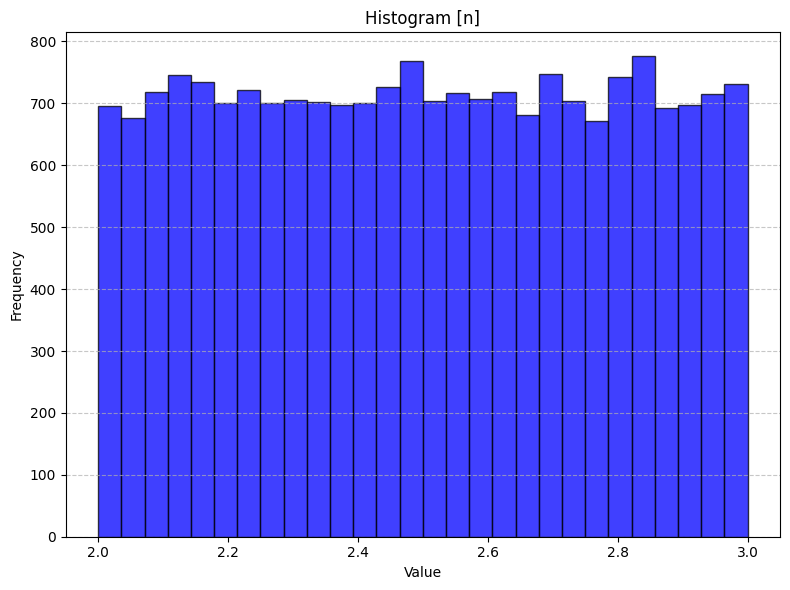

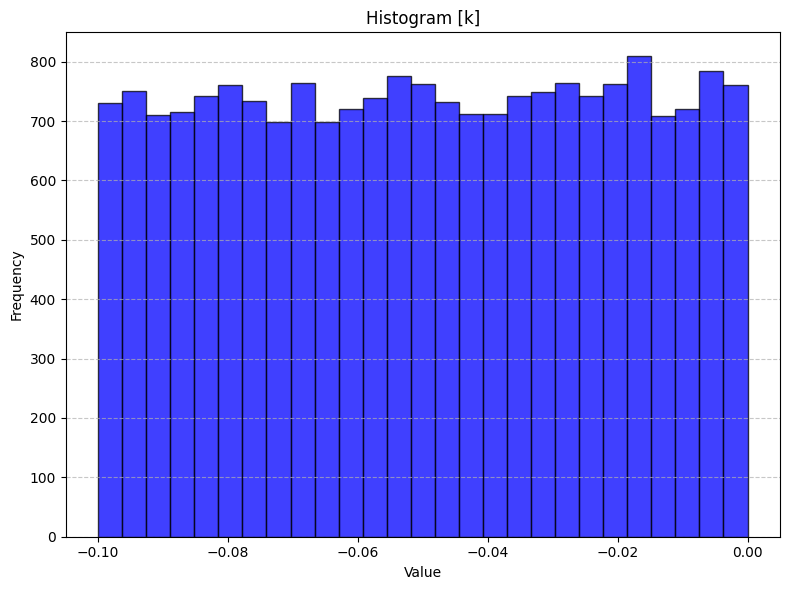

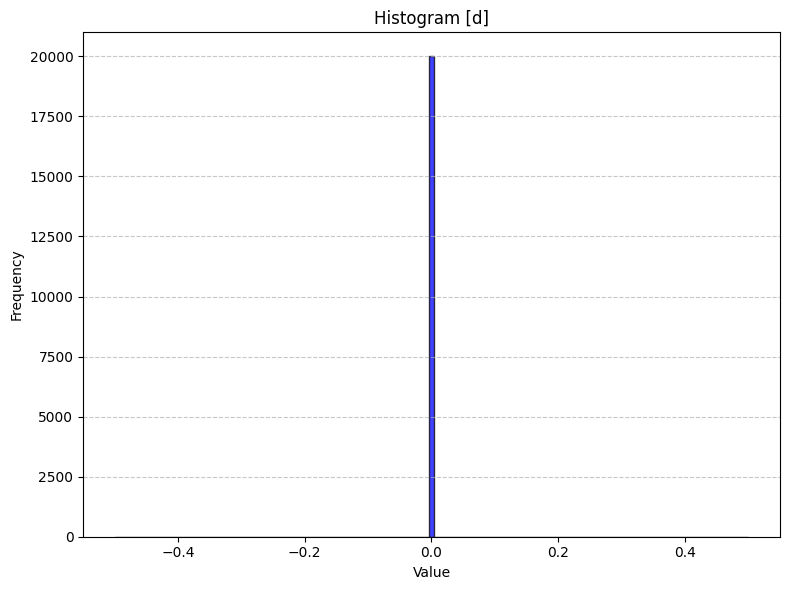

In [5]:
plot_histogram(dataset['n'], 'Histogram [n]')
plot_histogram(dataset['k'], 'Histogram [k]')
plot_histogram(dataset['d'], 'Histogram [d]')

In [6]:
dataset.to_csv(f'generated_datasets/dataset_size_{len(dataset["n"])}.csv', index=False)